### Isolation Forest

各点において次のことを行う

ランダムに１本線を引き、2つの領域に分離する

これを領域に指定した点しか無くなるまで繰り返す

この回数が少なければ異常値、多ければ正常値

https://hogetech.info/ml/algorithm/forest

          0
0  0.390000
1  0.910761
2  0.311148
3  0.820547
4  0.563721
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2001 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB
None
                 0
count  2001.000000
mean      0.583615
std       0.300984
min       0.157245
25%       0.255411
50%       0.534727
75%       0.928117
max       0.957084
anomaly
Normal     1401
Anomaly     600
Name: count, dtype: int64


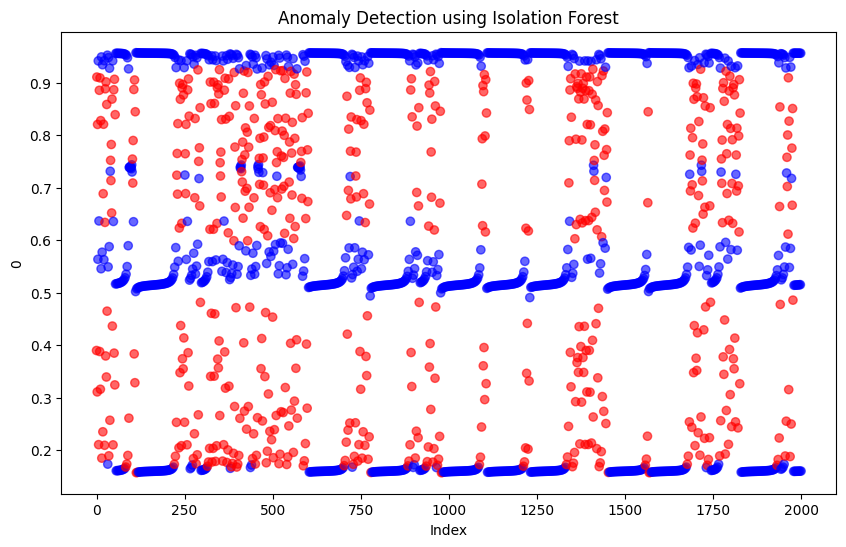

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('data_3.csv')

# データの確認
print(data.head())
print(data.info())

# データの統計量を確認
print(data.describe())

# データの前処理（必要に応じて）
# ここでは、欠損値の処理やスケーリングを行うことが考えられます

# Isolation Forestの実装
# 特徴量の選択（ここでは全ての数値列を対象とする）
features = data.select_dtypes(include=[np.number]) # 数値列のみを抽出

# Isolation Forestモデルの定義
model = IsolationForest(contamination=0.3, random_state=4)  #contaminationは異常値の割合, random_stateは乱数のシード

# モデルのフィッティング
model.fit(features)

# 異常値の予測
data['anomaly'] = model.predict(features)

# 異常値は-1、正常値は1
data['anomaly'] = data['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# 異常値の数を確認
print(data['anomaly'].value_counts())

# データの可視化（異常値の可視化）
plt.figure(figsize=(10, 6))
plt.scatter(data.index, features.iloc[:, 0], c=data['anomaly'].apply(lambda x: 'red' if x == 'Anomaly' else 'blue'), alpha=0.6)
plt.xlabel('Index')
plt.ylabel(features.columns[0])
plt.title('Anomaly Detection using Isolation Forest')
plt.show()


次元を増やすことで時系列として扱う

インターン前にメールで送る